In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/shrey/OneDrive/Documents/data.csv",nrows = 10000)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.drop(["Description"],axis=1,inplace=True)

In [7]:
df["CustomerID"].fillna(df["CustomerID"].mean(),inplace=True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_22172\1615216874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CustomerID"].fillna(df["CustomerID"].mean(),inplace=True)


In [8]:
df.isnull().sum()/df.shape[0] * 100

InvoiceNo      0.0
StockCode      0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10000 non-null  object 
 1   StockCode    10000 non-null  object 
 2   Quantity     10000 non-null  int64  
 3   InvoiceDate  10000 non-null  object 
 4   UnitPrice    10000 non-null  float64
 5   CustomerID   10000 non-null  float64
 6   Country      10000 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 547.0+ KB


In [ ]:
#EDA (dividing columns into categrical and numerical)
catcol = []
numcol = []
for i in df.columns:
    if df[i].dtype == 'object':
       catcol.append(i)
    else:
        numcol.append(i)

In [11]:
print(catcol)
print(numcol)

['InvoiceNo', 'StockCode', 'InvoiceDate', 'Country']
['Quantity', 'UnitPrice', 'CustomerID']


In [12]:
df[numcol].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,10000.0,7.828600,104.322417,-9360.0,1.00,2.000000,8.00,2880.00
UnitPrice,10000.0,3.837412,14.310148,0.0,1.25,2.510000,4.21,887.52
CustomerID,10000.0,15615.462576,1542.235910,12395.0,14729.00,15615.462576,16725.00,18239.00


In [13]:
df[catcol].describe().T

,count,unique,top,freq
InvoiceNo,10000,512,536876,593
StockCode,10000,2015,22632,63
InvoiceDate,10000,442,12/3/2010 11:36,593
Country,10000,15,United Kingdom,9403


<Axes: >

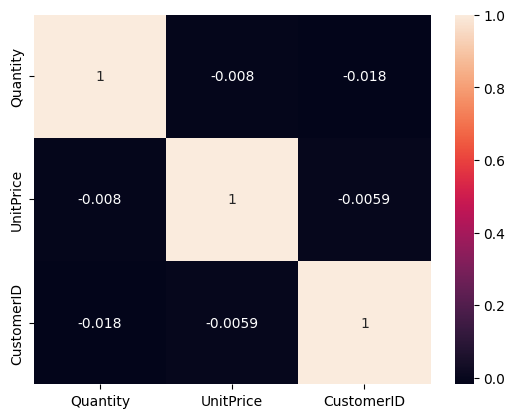

In [ ]:
#Correlational matrix
sns.heatmap(df[numcol].corr(),annot=True)

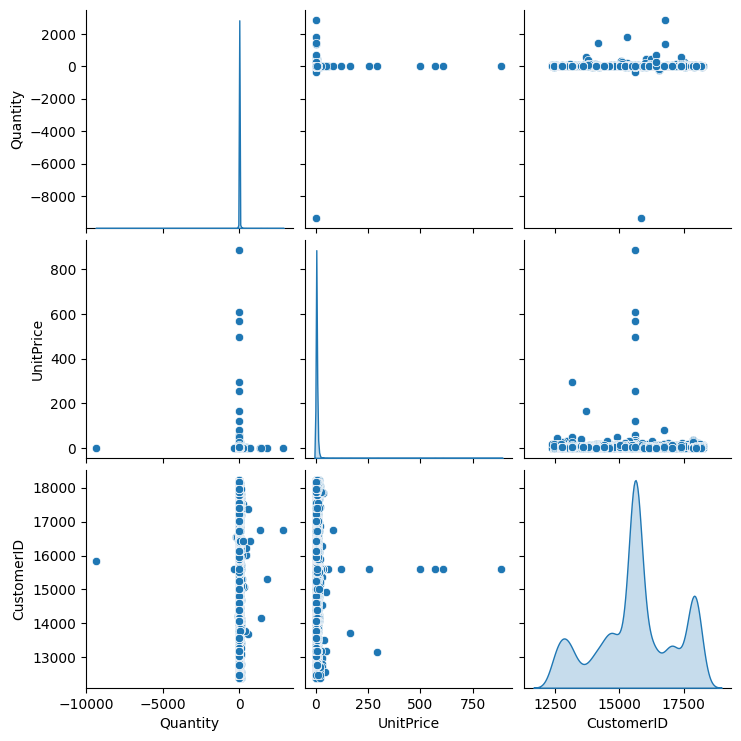

In [ ]:
# pairplot
sns.pairplot(df[numcol],diag_kind="kde")

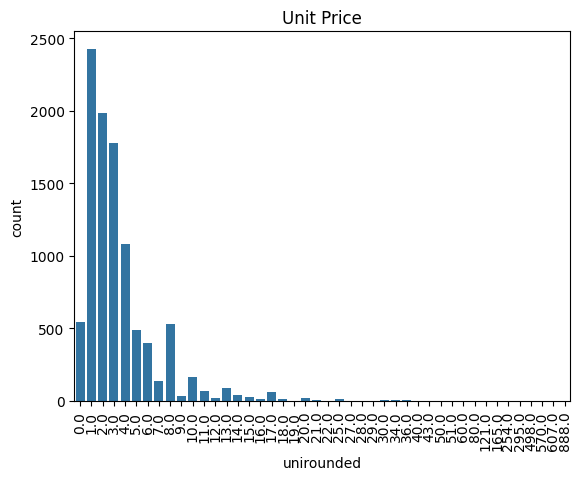

In [17]:
#Univariate analysis
df['unirounded'] = df['UnitPrice'].round(0)#nearest integer
sns.countplot(data=df, x='unirounded')
plt.title("Unit Price")
plt.xticks(rotation = 90)
plt.show()

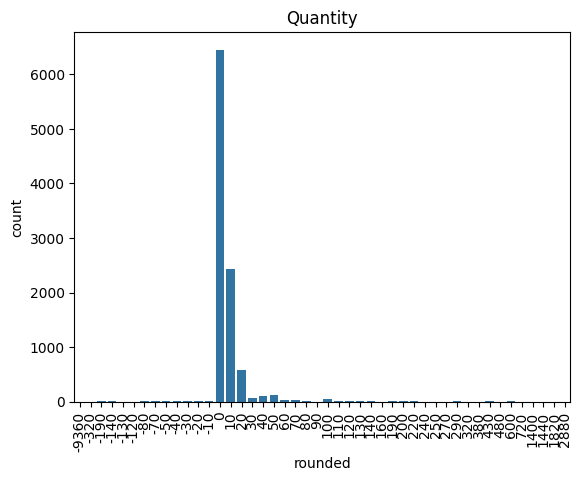

In [18]:
df['rounded'] = df['Quantity'].round(-1)#nearest 10 digts
sns.countplot(data=df, x='rounded')
plt.title("Quantity")
plt.xticks(rotation = 90)
plt.show()

In [19]:
#frequency
for i in catcol:
    print(i)
    print(df[i].value_counts)

InvoiceNo
<bound method IndexOpsMixin.value_counts of 0       536365
1       536365
2       536365
3       536365
4       536365
         ...  
9995    537224
9996    537224
9997    537224
9998    537224
9999    537224
Name: InvoiceNo, Length: 10000, dtype: object>
StockCode
<bound method IndexOpsMixin.value_counts of 0       85123A
1        71053
2       84406B
3       84029G
4       84029E
         ...  
9995     22622
9996     22623
9997     21363
9998     21556
9999     22497
Name: StockCode, Length: 10000, dtype: object>
InvoiceDate
<bound method IndexOpsMixin.value_counts of 0        12/1/2010 8:26
1        12/1/2010 8:26
2        12/1/2010 8:26
3        12/1/2010 8:26
4        12/1/2010 8:26
             ...       
9995    12/5/2010 16:24
9996    12/5/2010 16:24
9997    12/5/2010 16:24
9998    12/5/2010 16:24
9999    12/5/2010 16:24
Name: InvoiceDate, Length: 10000, dtype: object>
Country
<bound method IndexOpsMixin.value_counts of 0       United Kingdom
1       United Kingdom
2

In [20]:
#Customer Segmentation 
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
features = df[['Quantity', 'UnitPrice', 'TotalPrice']]

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
std_feature = scalar.fit_transform(features)

In [ ]:
#Hierarichal clustering
from scipy.cluster.hierarchy import linkage,dendrogram
linked = linkage(std_feature, method='ward')

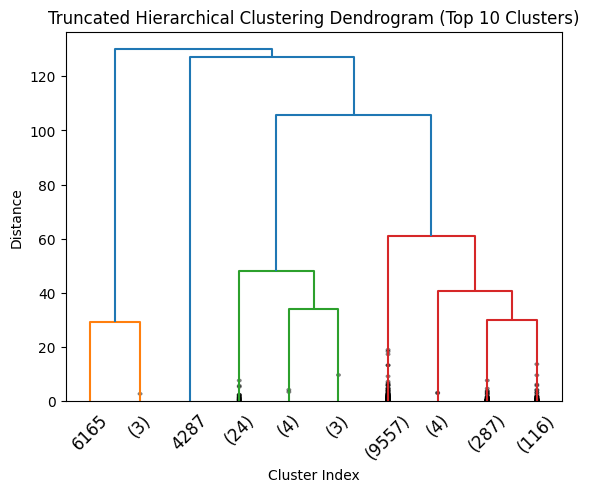

In [23]:
dend = dendrogram(linked,
                  truncate_mode="lastp",
                  p=10,
                   show_leaf_counts=True,
                  leaf_rotation=45.,
                  leaf_font_size=12.,
                  show_contracted=True
                  )
plt.title("Truncated Hierarchical Clustering Dendrogram (Top 10 Clusters)")
plt.xlabel("Cluster Index")
plt.ylabel("Distance")
plt.show()

In [24]:
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(linked, t=3, criterion='maxclust')
df['Cluster'] = cluster_labels
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,unirounded,rounded,TotalPrice,Cluster
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,3.0,10,15.30,2
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3.0,10,20.34,2
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,3.0,10,22.00,2
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3.0,10,20.34,2
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3.0,10,20.34,2


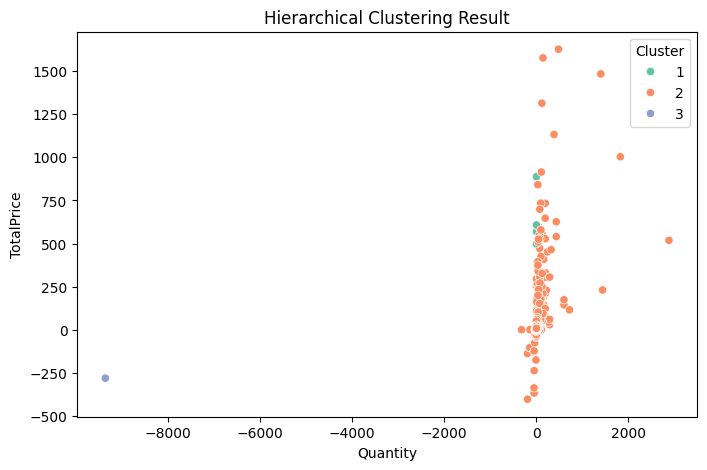

In [ ]:
#cluster visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Quantity', y='TotalPrice', hue='Cluster', palette='Set2')
plt.title("Hierarchical Clustering Result")
plt.show()

In [ ]:
#Purchase prediction
from sklearn.preprocessing import LabelEncoder
#encoding
le = LabelEncoder()
for col in catcol:
    df[col] = le.fit_transform(df[col])


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,unirounded,rounded,TotalPrice,Cluster,HighBalance
0,0,1839,6,102,2.55,17850.0,14,3.0,10,15.30,2,False
1,0,1524,6,102,3.39,17850.0,14,3.0,10,20.34,2,False
2,0,1638,8,102,2.75,17850.0,14,3.0,10,22.00,2,False
3,0,1613,6,102,3.39,17850.0,14,3.0,10,20.34,2,False
4,0,1612,6,102,3.39,17850.0,14,3.0,10,20.34,2,False


In [ ]:
#Model preparation
X = df.drop('HighPurchase',axis=1)
y = df['HighPurchase']

In [ ]:
# splitting test and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#predictions
log_train_pred = model.predict(X_train)
log_pred = model.predict(X_test)

In [ ]:
#Classification Report
print(classification_report(y_train,log_train_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7974
        True       1.00      1.00      1.00        26

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
#Confusion Matrix
print(confusion_matrix(y_train,log_train_pred))

[[7974    0]
 [   0   26]]


In [74]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1997
        True       0.75      1.00      0.86         3

    accuracy                           1.00      2000
   macro avg       0.88      1.00      0.93      2000
weighted avg       1.00      1.00      1.00      2000



In [76]:
print(confusion_matrix(y_test,log_pred))

[[1996    1]
 [   0    3]]


In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( criterion="gini")#(thies will cause overfitting)

In [79]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
y_pred = dt.predict(X_test)

In [ ]:
#Avoid overfitting by setting parameters
reg_dt = DecisionTreeClassifier(criterion="gini",max_depth= 7 ,min_samples_leaf=10,min_samples_split=30)
reg_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

1.0


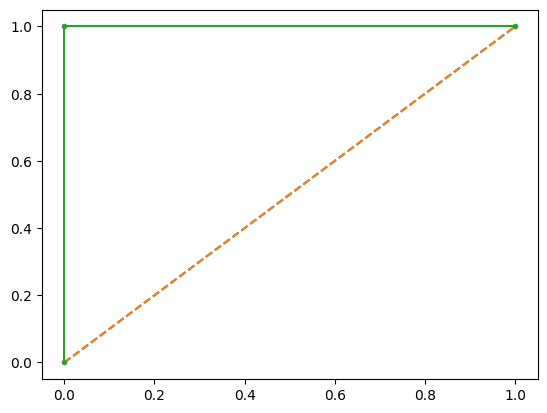

In [ ]:
#AUC-ROC curve for train data
probs = reg_dt.predict_proba(X_train)
probs = probs[:,1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train,probs)
print(auc)
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
plt.show()

1.0


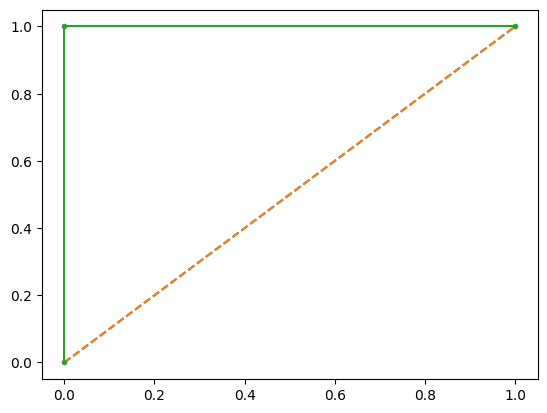

In [ ]:
#AUC-ROC curve for test data
probs = reg_dt.predict_proba(X_test)
probs = probs[:,1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,probs)
print(auc)
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,probs)
plt.plot([0,1],[0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
plt.show()

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1997
        True       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [91]:
print(confusion_matrix(y_test,y_pred))

[[1997    0]
 [   0    3]]


In [ ]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100,random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [95]:
ytrain_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

1.0


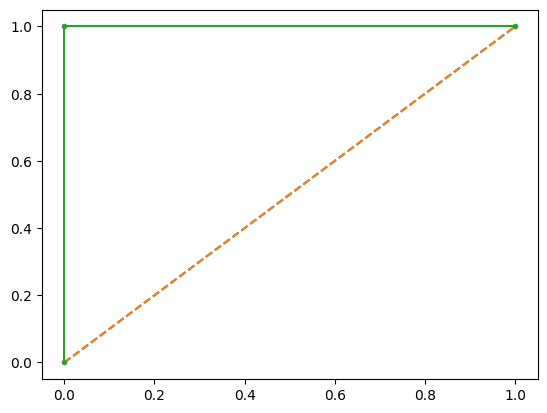

In [ ]:
#AUC-ROC curve for train data
probs = reg_dt.predict_proba(X_train)
probs = probs[:,1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train,probs)
print(auc)
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
plt.show()

1.0


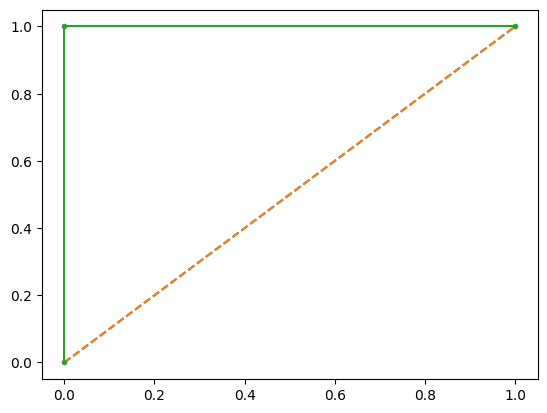

In [ ]:
#AUC-ROC curve for test data
probs = reg_dt.predict_proba(X_test)
probs = probs[:,1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,probs)
print(auc)
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,probs)
plt.plot([0,1],[0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
plt.show()

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1997
        True       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [102]:
print(confusion_matrix(y_test,y_pred))

[[1997    0]
 [   0    3]]
